In [1]:
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import time
import pylab as pl
from IPython import display

In [2]:
# temperatures from last Friday, June 3
temp_june3 = [70, 60, 55, 70, 62, 78, 62, 60, 44, 65, 65, 64, 55, 72, 80, 80, 74, 70]
n = len(temp_june3)

Text(0.5, 1.0, 'Temperatures - Friday, June 3')

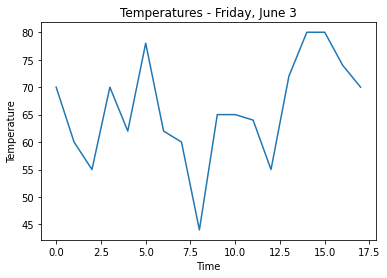

In [3]:
# plot temperatures
plt.plot(temp_june3)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperatures - Friday, June 3')

In [4]:
# calculating metrics from last Friday's data
metrics = {}
metrics["median"] = np.percentile(temp_june3, 50)
metrics["sd"] = np.std(temp_june3)
metrics["lower_bound"] = metrics["median"] - 2 * metrics["sd"]
metrics["upper_bound"] = metrics["median"] + 2 * metrics["sd"]
metrics["ninety_pct"] = np.percentile(temp_june3, 90)
metrics["ten_pct"] = np.percentile(temp_june3, 10)
metrics["seventy_five_pct"] = np.percentile(temp_june3, 75)
metrics["twenty_five_pct"] = np.percentile(temp_june3, 25)

In [5]:
# printing metrics
median = round(metrics["median"], 2)
sd = round(metrics["sd"], 2)
lower_bound = round(metrics["lower_bound"], 2)
upper_bound = round(metrics["upper_bound"], 2)
ninety_pct = round(metrics["ninety_pct"], 2)
ten_pct = round(metrics["ten_pct"], 2)
seventy_five_pct = round(metrics["seventy_five_pct"], 2)
twenty_five_pct = round(metrics["twenty_five_pct"], 2)

print("Median:", median)
print("Standard Deviation:", sd)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Ninety Percentile:", ninety_pct)
print("Ten Percentile:", ten_pct)
print("Seventy Five percentile:", seventy_five_pct)
print("Twenty Five percentile:", twenty_five_pct)

Median: 65.0
Standard Deviation: 9.19
Lower Bound: 46.62
Upper Bound: 83.38
Ninety Percentile: 78.6
Ten Percentile: 55.0
Seventy Five percentile: 71.5
Twenty Five percentile: 60.5


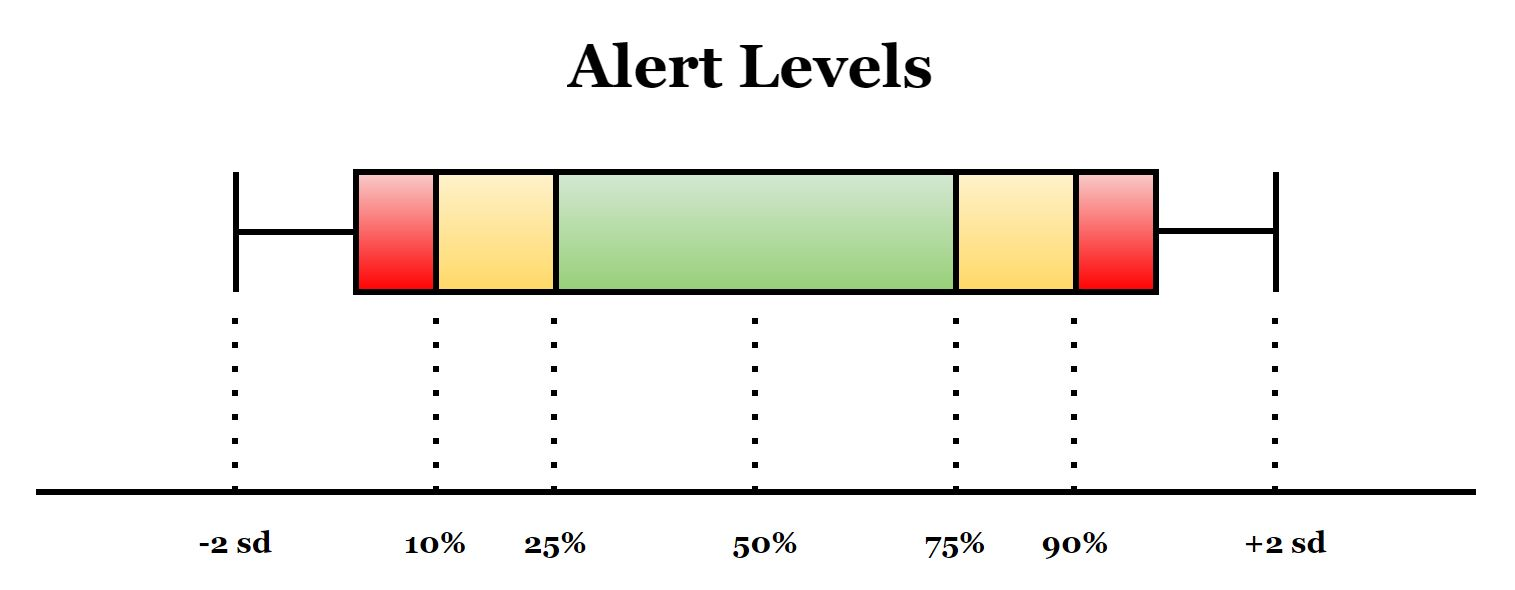

In [6]:
# function that determines alert level
def classify_temp(temp, metrics):
    # unpacking metrics
    median = metrics["median"]
    sd = metrics["sd"]
    lower_bound = metrics["lower_bound"]
    upper_bound = metrics["upper_bound"]
    ninety_pct = metrics["ninety_pct"]
    ten_pct = metrics["ten_pct"]
    seventy_five_pct = metrics["seventy_five_pct"]
    twenty_five_pct = metrics["twenty_five_pct"]
    
    if temp < lower_bound or temp > upper_bound:
        return "Out of Bounds"
    elif temp < ten_pct or temp > ninety_pct:
        return "Red"
    elif temp < twenty_five_pct or temp > seventy_five_pct:
        return "Yellow"
    else:
        return "Green"


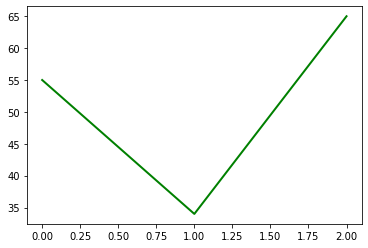

Alert level for 65.0 degrees: Green!
Change in temperature by 31.0 degrees


In [ ]:
# testing user input and determining alert levels
%matplotlib inline

color_map = {"Red": "red", "Yellow": "yellow", "Green": "green", "Out of Bounds": "magenta"}
n = 20            # ask user to enter 20 temperatures
temp_june10 = []  # stores temperature for today - Friday, June 10
queue = deque()   # double-ended queue that stores the last 5 differences in temperature
total = 0
# for 5 consecutive temps, queue holds at most 4 temp differences
# sum of the differences in the queue tells whether temp is increasing or decreasing
for i in range(n):
    temp = float(input("Enter a temperature: "))
    temp_june10.append(temp)
    
    # plot new temperature value
    alert_level = classify_temp(temp, metrics)
    color = color_map[alert_level]
    pl.clf()
    pl.plot(temp_june10, color, linewidth=2)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print(f"Alert level for {temp} degrees: {alert_level}!")

    # check for steady increase (+20) or decrease (-20) in last five temperatures
    if i == 0:  # skip the first temp
        continue
    if i >= 5:  # after encountering 5 temps remove 5th last temp difference from the queue
        total -= queue.popleft()
    curr_temp = temp_june10[i]
    last_temp = temp_june10[i-1]
    diff = curr_temp - last_temp
    total += diff
    print(f"Change in temperature by {round(diff, 2)} degrees")
    if i >= 4 and (total >= 20 or total <= -20):
        direction = "increased" if total >= 20 else "decreased"
        print(f"WARNING: Temperature has {direction} by at least 20 degrees in the last 5 measurements")
    queue.append(diff)
